<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.256503,55.423226,9.035514,135.715243,118.564205,17.151038
1,0.0,1.0,80.179068,79.452898,66.119604,235.751570,157.348201,78.403369
2,0.0,2.0,54.675272,62.740785,6.891532,134.307590,119.833070,14.474520
3,0.0,3.0,45.923246,56.432549,16.847524,129.203319,106.419493,22.783827
4,0.0,4.0,98.270687,99.423049,-39.808131,167.885606,191.600557,-23.714951
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.360629,43.424344,52.953714,179.738686,123.472786,56.265901
19996,999.0,16.0,72.940710,72.811746,57.506778,213.259234,142.552496,70.706738
19997,999.0,17.0,30.238258,79.756105,-24.574307,95.420057,115.100758,-19.680701
19998,999.0,18.0,79.981833,70.458207,-119.288826,41.151214,146.281390,-105.130176


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    61.256503  55.423226    9.035514  135.715243  118.564205   
      1.0    80.179068  79.452898   66.119604  235.751570  157.348201   
      2.0    54.675272  62.740785    6.891532  134.307590  119.833070   
      3.0    45.923246  56.432549   16.847524  129.203319  106.419493   
      4.0    98.270687  99.423049  -39.808131  167.885606  191.600557   
...                ...        ...         ...         ...         ...   
999.0 15.0   73.360629  43.424344   52.953714  179.738686  123.472786   
      16.0   72.940710  72.811746   57.506778  213.259234  142.552496   
      17.0   30.238258  79.756105  -24.574307   95.420057  115.100758   
      18.0   79.981833  70.458207 -119.288826   41.151214  146.281390   
      19.0   68.143747  92.503666  -29.796916  140.850497  151.949906   

                  e_hat  
rep   index              
0.0   0.0     17.151038  
      1.0     78.403369  
      2.0     14.474520  
      3.0     22.783827  
      4.0    -23.714951  
...                 ...  
999.0 15.0    56.265901  
      16.0    70.706738  
      17.0   -19.680701  
      18.0  -105.130176  
      19.0   -11.099409  

[20000 rows x 6 columns]

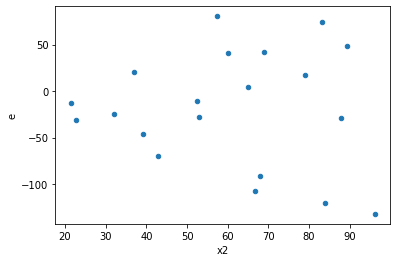

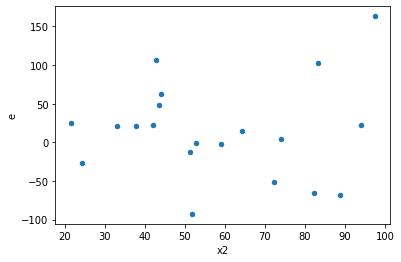

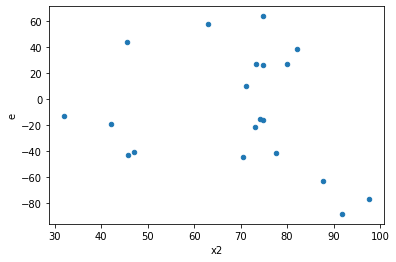

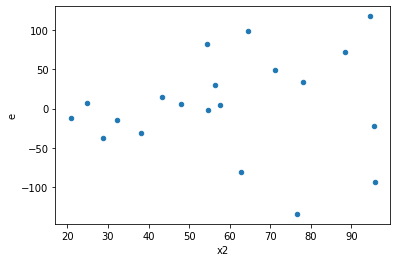

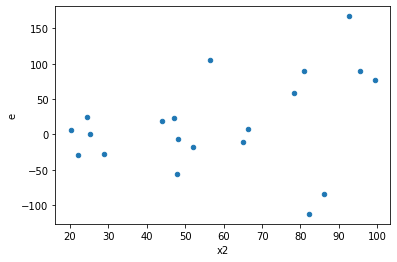

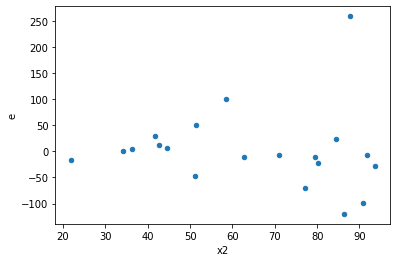

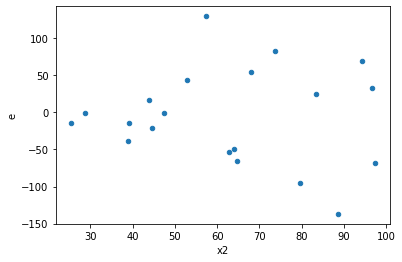

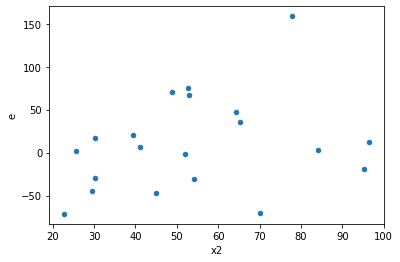

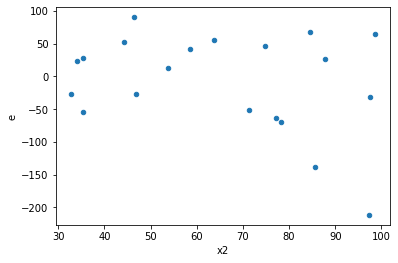

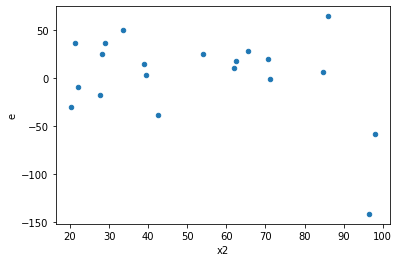

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,4888.032180907487,19642.975148436817,814.6720301512478,3273.829191406136,4.018585480096001,0.11470549643211303,0.9426472517839435,0.057352748216056515,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,1237.5149781049736,18678.342621627668,206.25249635082892,3113.0571036046113,15.0934275157058,0.0043621560631390555,0.9978189219684305,0.0021810780315695277,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,10741.327092494075,30041.412161226654,1790.2211820823459,5006.902026871109,2.7968063817942266,0.23625353172514596,0.881873234137427,0.11812676586257298,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,6078.1434536105535,80575.04400624872,1013.0239089350922,13429.174001041452,13.25652226230122,0.006196384455365855,0.9969018077723171,0.0030981922276829277,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,1975.8309729262417,23936.876006518763,329.3051621543736,3989.4793344197938,12.114839950640016,0.007883127088297082,0.9960584364558515,0.003941563544148541,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,2269.7762655745432,31769.158183013667,378.2960442624239,5294.859697168945,13.996603394287416,0.0053526440852336155,0.9973236779573832,0.0026763220426168077,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,1198.1171060320755,26325.258356678467,199.68618433867925,4387.5430594464115,21.972191386084507,0.0015439193554520614,0.999228040322274,0.0007719596777260307,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,1922.678846246586,30146.121824865244,320.44647437443103,5024.35363747754,15.67922894856615,0.0039319123959256075,0.9980340438020372,0.0019659561979628037,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,2139.6866625335333,60615.56183851969,356.61444375558887,10102.59363975328,28.329176836923764,0.0007527486680805051,0.9996236256659597,0.00037637433404025256,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,4888.032180907487,19642.975148436817,814.6720301512478,3273.829191406136,4.018585480096001,0.11470549643211303,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,1237.5149781049736,18678.342621627668,206.25249635082892,3113.0571036046113,15.0934275157058,0.0043621560631390555,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,10741.327092494075,30041.412161226654,1790.2211820823459,5006.902026871109,2.7968063817942266,0.23625353172514596,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,6078.1434536105535,80575.04400624872,1013.0239089350922,13429.174001041452,13.25652226230122,0.006196384455365855,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,1975.8309729262417,23936.876006518763,329.3051621543736,3989.4793344197938,12.114839950640016,0.007883127088297082,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,2269.7762655745432,31769.158183013667,378.2960442624239,5294.859697168945,13.996603394287416,0.0053526440852336155,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,1198.1171060320755,26325.258356678467,199.68618433867925,4387.5430594464115,21.972191386084507,0.0015439193554520614,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,1922.678846246586,30146.121824865244,320.44647437443103,5024.35363747754,15.67922894856615,0.0039319123959256075,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,2139.6866625335333,60615.56183851969,356.61444375558887,10102.59363975328,28.329176836923764,0.0007527486680805051,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      563
Reject005=0 : Heteroscedasticity    437
Name: Result_test, dtype: int64